#Sets

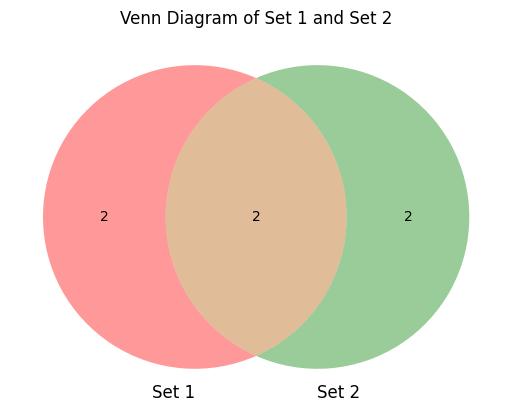

Intersection: {3, 4}
Join: {1, 2, 3, 4, 5, 6}
Complement: {5, 6}
Cartesian Product: [(1, 'a'), (1, 'b'), (2, 'a'), (2, 'b')]
Power Set: [(), (1,), (2,), (3,), (1, 2), (1, 3), (2, 3), (1, 2, 3)]
Cardinality: 5


In [1]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import itertools

# 1. Venn Diagrams:
# Venn diagrams are illustrations that show all possible logical relations between a finite collection of different sets.
# Here, we use matplotlib_venn library to create a Venn diagram representing the intersection and union of two sets.

set1 = {1, 2, 3, 4}
set2 = {3, 4, 5, 6}

venn2([set1, set2], ('Set 1', 'Set 2'))
plt.title("Venn Diagram of Set 1 and Set 2")
plt.show()

# 2. Join, Intersection, and Complement:
# Join (Union) combines all elements from two sets, Intersection finds common elements,
# and Complement finds the elements in set2 that are not in set1.

intersection = set1.intersection(set2)
print("Intersection:", intersection)

join = set1.union(set2)
print("Join:", join)

complement = set2 - set1
print("Complement:", complement)

# 3. Cartesian Product:
# The Cartesian product of two sets is a set of all possible ordered pairs from the two sets.

set1 = {1, 2}
set2 = {'a', 'b'}

cartesian_product = list(itertools.product(set1, set2))
print("Cartesian Product:", cartesian_product)

# 4. Power Set of Sets:
# The power set of a set is the set of all its subsets, including the empty set and itself.

set1 = {1, 2, 3}
power_set = list(itertools.chain.from_iterable(itertools.combinations(set1, r) for r in range(len(set1)+1)))
print("Power Set:", power_set)

# 5. Cardinality of Finite Sets:
# Cardinality refers to the number of elements in a set.

set1 = {1, 2, 3, 4, 5}
cardinality = len(set1)
print("Cardinality:", cardinality)


#Relations

In [9]:
# 1. Reflexivity, Symmetry, and Transitivity:

# Example relation
relation = {(1, 1), (2, 2), (3, 3), (1, 2), (2, 1)}

def is_reflexive(rel):
    """
    Checks if a relation is reflexive.
    A relation R on a set A is reflexive if every element in A is related to itself.
    """
    # Check if every element is related to itself
    return all((x, x) in rel for x in {item for sublist in rel for item in sublist})

def is_symmetric(rel):
    """
    Checks if a relation is symmetric.
    A relation R on a set A is symmetric if whenever (a, b) is in R, then (b, a) is also in R.
    """
    # Check if whenever (a, b) is in R, then (b, a) is also in R
    return all((y, x) in rel for x, y in rel)

def is_transitive(rel):
    """
    Checks if a relation is transitive.
    A relation R on a set A is transitive if whenever (a, b) is in R and (b, c) is in R, then (a, c) is also in R.
    """
    # Check if whenever (a, b) is in R and (b, c) is in R, then (a, c) is also in R
    return all((x, z) in rel for x, y in rel for w, z in rel if y == w)

print("Reflexive:", is_reflexive(relation))
print("Symmetric:", is_symmetric(relation))
print("Transitive:", is_transitive(relation))

# 2. Relations of Equivalence:

# Example equivalence relation
equivalence_relation = {(1, 1), (2, 2), (3, 3), (1, 2), (2, 1), (2, 3), (3, 2)}

print("Equivalence Relation:", is_reflexive(equivalence_relation) and is_symmetric(equivalence_relation) and is_transitive(equivalence_relation))

# 3. Relation of Partial Order and Partially Ordered Sets:

# Example partial order relation
partial_order_relation = {(1, 1), (2, 2), (3, 3), (1, 2), (2, 3)}

def is_antisymmetric(rel):
    """
    Checks if a relation is antisymmetric.
    A relation R on a set A is antisymmetric if whenever (a, b) and (b, a) are in R, then a = b.
    """
    # Check if whenever (a, b) and (b, a) are in R, then a = b
    return all((x, y) not in rel or (y, x) not in rel or x == y for x, y in rel)

print("Partial Order Relation:", is_reflexive(partial_order_relation) and is_antisymmetric(partial_order_relation) and is_transitive(partial_order_relation))

#4. Extreme elements of a partially ordered set

def extreme_elements(partial_order_set):
    """
    Finds extreme elements of a partially ordered set.

    Args:
    partial_order_set: A list of tuples representing the relation in the partially ordered set.
                      Each tuple should be of the form (x, y) indicating that x is related to y.

    Returns:
    A tuple containing two lists, the first list contains the maximal elements
    and the second list contains the minimal elements.
    """

    # Initialize lists to store maximal and minimal elements
    maximal_elements = []
    minimal_elements = []

    # Check each element in the partially ordered set
    for x in partial_order_set:
        # Initialize flags to check if x is maximal or minimal
        is_maximal = True
        is_minimal = True

        # Check if x is maximal by comparing with other elements y
        for y in partial_order_set:
            if x != y:  # Skip self-comparison
                # Check if there exists an element y such that x is not greater than y
                if x[0] == y[0] and x[1] < y[1]:
                    is_maximal = False
                    break
        # If x remained maximal, add it to the list of maximal elements
        if is_maximal:
            maximal_elements.append(x[0])

        # Check if x is minimal by comparing with other elements y
        for y in partial_order_set:
            if x != y:  # Skip self-comparison
                # Check if there exists an element y such that x is not lesser than y
                if x[0] == y[0] and x[1] > y[1]:
                    is_minimal = False
                    break
        # If x remained minimal, add it to the list of minimal elements
        if is_minimal:
            minimal_elements.append(x[0])

    # Return the lists of maximal and minimal elements
    return maximal_elements, minimal_elements

# Example usage:
partial_order_set = [(1, 2), (1, 3), (2, 3), (3, 4), (2, 4)]
maximals, minimals = extreme_elements(partial_order_set)
print("Maximal elements:", maximals)
print("Minimal elements:", minimals)


Reflexive: True
Symmetric: True
Transitive: True
Equivalence Relation: False
Partial Order Relation: False
Maximal elements: [1, 3, 2]
Minimal elements: [1, 2, 3]


#Functions

In [14]:
# 1.3.1. Injections, Surjections, Bijections, Total Functions.

def injection_surjection_bijection_total_functions(domain, codomain, function):
    """
    Determines if a function is an injection, surjection, bijection, or total function.

    Args:
    domain: A list representing the domain of the function.
    codomain: A list representing the codomain of the function.
    function: A dictionary representing the function where keys are elements of the domain
              and values are elements of the codomain.

    Returns:
    A tuple containing four boolean values:
    - True if the function is an injection, False otherwise.
    - True if the function is a surjection, False otherwise.
    - True if the function is a bijection, False otherwise.
    - True if the function is a total function, False otherwise.
    """
    # Check for injection
    is_injection = len(set(function.values())) == len(function)

    # Check for surjection
    is_surjection = set(function.values()) == set(codomain)

    # Check for bijection
    is_bijection = is_injection and is_surjection

    # Check for total function
    is_total_function = set(function.keys()) == set(domain)

    return is_injection, is_surjection, is_bijection, is_total_function


# Example usage:
domain = [1, 2, 3]
codomain = ['a', 'b', 'c', 'd']
function = {1: 'a', 2: 'b', 3: 'c'}

is_injection, is_surjection, is_bijection, is_total_function = \
    injection_surjection_bijection_total_functions(domain, codomain, function)

print("Is Injection:", is_injection)
print("Is Surjection:", is_surjection)
print("Is Bijection:", is_bijection)
print("Is Total Function:", is_total_function)


# 1.3.2. Inverses.

def inverse_function(function):
    """
    Computes the inverse of a function.

    Args:
    function: A dictionary representing the function.

    Returns:
    A dictionary representing the inverse function.
    """
    inverse = {v: k for k, v in function.items()}
    return inverse


# Example usage:
function = {1: 'a', 2: 'b', 3: 'c'}
inverse = inverse_function(function)
print("Original function:", function)
print("Inverse function:", inverse)


# 1.3.3. Composition.

def function_composition(f, g):
    """
    Computes the composition of two functions.

    Args:
    f: A dictionary representing the first function.
    g: A dictionary representing the second function.

    Returns:
    A dictionary representing the composition of the two functions.
    """
    composition = {x: g[f[x]] for x in f}
    return composition


# Example usage:
f = {1: 2, 2: 3, 3: 4}
g = {2: 'a', 3: 'b', 4: 'c'}
composition = function_composition(f, g)
print("Composition of f and g:", composition)


Is Injection: True
Is Surjection: False
Is Bijection: False
Is Total Function: True
Original function: {1: 'a', 2: 'b', 3: 'c'}
Inverse function: {'a': 1, 'b': 2, 'c': 3}
Composition of f and g: {1: 'a', 2: 'b', 3: 'c'}
